# Unsupervised Leaning - Clustering : Songs dataset

## Importing relevent libraries

In [53]:
import numpy as np
import csv
from numpy import genfromtxt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import euclidean
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline


## 1 : Loading songs data and vectorizing using TF-IDF vectorization

In [2]:
songs = pd.read_csv("songdata.csv", delimiter=",", quoting=0)

In [3]:
songs.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [4]:
#Tf-IDF vectorization
tfidf = TfidfVectorizer(min_df = 100, stop_words = 'english')
X = tfidf.fit_transform(songs["text"])
X.shape

(57650, 3443)

## Clustering data into 3 clusters using K-Means

In [54]:
#Clustering using kmeans and 3 clusters
kmeans = KMeans(3)
clusters = kmeans.fit_predict(X)
clusters

array([0, 1, 0, ..., 0, 0, 2], dtype=int32)

[0.00046916 0.0002399  0.00025553 ... 0.00050005 0.0006477  0.000411  ]


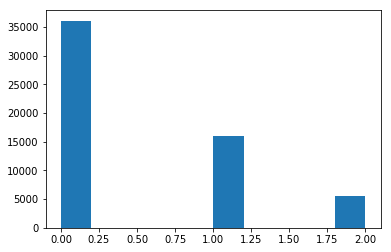

In [55]:
#Cluster plots and bin counts
np.bincount(clusters)
plt.hist(clusters)

#Cluster centers
print(kmeans.cluster_centers_[0])

#Elements in cluster 1
cluster_1=np.where(clusters==0)
X_cluster1 = X[cluster_1]

#Elements in cluster 2
cluster_2=np.where(clusters==1)
X_cluster2 = X[cluster_2]

#Elements in cluster 3
cluster_3=np.where(clusters==2)
X_cluster3 = X[cluster_3]


#### ---------------------------------------------------------
#### ANALYSIS - We can see that most of the songs are being clustered in the second clusters with a considerable number in the third and small number in the first cluster
#### ----------------------------------------------------------

In [56]:
#Converting sparse matrix to normal matrix to allow matrix subtraction for distance calculation
X_cluster1 = X_cluster1.toarray()
X_cluster2 = X_cluster2.toarray()
X_cluster3 = X_cluster3.toarray()

## Finding the top 5 closest documents to each cluster centroid

In [66]:
#CLUSTER 1
distancelist1 = []
for i in range(X_cluster1.shape[0]):
    distance = euclidean(X_cluster1[i],kmeans.cluster_centers_[0])
    distancelist1.append([cluster_1[0][i],distance])
    
distancelist1
Dist = pd.DataFrame(distancelist1, columns = ("index","dist")).sort_values(by = ["dist"], ascending = True)
clust1Index = Dist.index[0:5]

print("Top 5 closest documents to centroid of Cluster1 are :")
print(songs.loc[clust1Index,["song","artist"]].to_string(index = False))

Top 5 closest documents to centroid of Cluster1 are :
song         artist
                                 October    Evanescence
                      Sober And Unkissed            Sia
Bob White (Whatcha Gonna Swing Tonight?)    Bing Crosby
                          What A Feeling  One Direction
                     Soon We'll Be Found            Sia


#### ANALYSIS of above result - The first cluster has least number of songs and the closest songs to this cluster seem to be love songs

In [63]:
#CLUSTER 2
distancelist2 = []
for i in range(X_cluster2.shape[0]):
    distance2 = euclidean(X_cluster2[i],kmeans.cluster_centers_[1])
    distancelist2.append([cluster_2[0][i],distance2])
    
Dist = pd.DataFrame(distancelist2, columns = ("index","dist")).sort_values(by = ["dist"], ascending = True)
clust2Index = Dist.index[0:5]

print("Top 5 closest documents to centroid of Cluster2 are :")
print(songs.loc[clust2Index,["song","artist"]].to_string(index = False))

Top 5 closest documents to centroid of Cluster2 are :
song          artist
                 I Cover The Waterfront  Billie Holiday
                    Ballad Of Flo'Z Kid      Jason Mraz
                       Away In A Manger  Linda Ronstadt
You Can't Put Your Arms Around A Memory   Guns N' Roses
                       The Demon's Whip         Manowar


#### ANALYSIS of above result - We can see that since the 2nd cluster has the most number of songs in it, the range vague and broad. 

In [65]:
#CLUSTER 3
distancelist3 = []
for i in range(X_cluster3.shape[0]):
    distance3 = euclidean(X_cluster3[i],kmeans.cluster_centers_[2])
    distancelist3.append([cluster_3[0][i],distance3])
    
Dist = pd.DataFrame(distancelist3, columns = ("index","dist")).sort_values(by = ["dist"], ascending = True)
clust3Index = Dist.index[0:5]

print("Top 5 closest documents to centroid of Cluster2 are :")
print(songs.loc[clust3Index,["song","artist"]].to_string(index = False))

Top 5 closest documents to centroid of Cluster2 are :
song          artist
        Gimme That     Chris Brown
All I Need To Know    Bette Midler
     Perfect Lover  Britney Spears
         All I Ask           Adele
  I Wanna Be Loved       Everclear


#### ANALYSIS
Fist cluster seems to be a cluster of POP and ALTERATIVE ROCK MUSIC

Second cluster seems to be ROCK and METAL music

Third cluster seems to be POP and DANCE music


## Reducing dimentionality to 50 components and finding top 5 faetures for each component

In [67]:
#LSA dimentionality reduction
lsa = TruncatedSVD(50)
Z = lsa.fit_transform(X)
Z.shape

(57650, 50)

In [70]:
vocab = np.array(tfidf.get_feature_names())

for i in range(Z.shape[1]):
    order = np.abs(lsa.components_[i]).argsort()[::-1]
    print("Top 5 Features for Component %d are %s" %(i,vocab[order[:6]]))

Top 5 Features for Component 0 are ['love' 'don' 'know' 'll' 'oh' 'just']
Top 5 Features for Component 1 are ['love' 'got' 'don' 'heart' 'like' 'gonna']
Top 5 Features for Component 2 are ['oh' 'baby' 'yeah' 'll' 'time' 've']
Top 5 Features for Component 3 are ['oh' 'don' 'baby' 'want' 'know' 'll']
Top 5 Features for Component 4 are ['don' 'baby' 'oh' 'want' 'know' 'got']
Top 5 Features for Component 5 are ['baby' 'll' 'got' 'love' 'yeah' 'like']
Top 5 Features for Component 6 are ['la' 'got' 've' 'want' 'oh' 'let']
Top 5 Features for Component 7 are ['yeah' 'want' 've' 'let' 'baby' 'got']
Top 5 Features for Component 8 are ['ll' 'want' 'yeah' 'gonna' 'baby' 'know']
Top 5 Features for Component 9 are ['want' 'let' 'don' 'll' 've' 'got']
Top 5 Features for Component 10 are ['let' 'got' 've' 'yeah' 'don' 'like']
Top 5 Features for Component 11 are ['yeah' 'gonna' 've' 'll' 'like' 'ain']
Top 5 Features for Component 12 are ['gonna' 'll' 'like' 'girl' 'let' 'got']
Top 5 Features for Compon

### ANALYSIS 
#### Looking the first five features of each component, we can see the first few components have features related to love- love baby, heart, want, etc. Since the first few components of the SVD capture the most information, we can assume that a large number of songs in our dataset are love songs. 
#### The next few components have features like Christmas, chorus, etc which says that Christmas songs are also significant in out dataset. 
#### Looking at all the components as a whole, we can say the most of the songs wtitten are either about love, Christmas or life and that alot of them are written for girls ince "girl" is a feature in alot of the components. 

## Selecting appropriate number of clusters using elbow method

[8749.3202546244, 8480.73720996979, 8254.67278564118, 8048.936118792911, 7932.632906168705, 7756.432053795088, 7600.493244960108, 7477.276649450664]


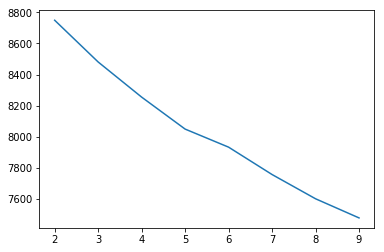

In [72]:
#Elbow plot to find the apropriate number of cluster 
inertia = []
for i in range(2,10):
    kmeans = KMeans(i)
    clustersLD = kmeans.fit_predict(Z)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.plot(range(2, 10), inertia)

### ANALYSIS 
####  We cannot see a stark difference in the inertia while moving through the number of clusters. But looking carefully, there a small elbow at 5, so we can say that 5 clusters is an appropriate number for the number of clusters. 

In [85]:
kmeans = KMeans(5)
clusters = kmeans.fit_predict(Z)
clusters

array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

In [86]:
for j in range(5):
    clusterN=np.where(clusters==j)
    Z_clusterN = Z[clusterN]
    #Z_clusterN = Z_clusterN.toarray()
    distancelist1 = []
    for i in range(Z_clusterN.shape[0]):
        distance = euclidean(Z_clusterN[i],kmeans.cluster_centers_[j])
        distancelist1.append([clusterN[0][i],distance])

    #distancelist1
    Dist = pd.DataFrame(distancelist1, columns = ("index","dist")).sort_values(by = ["dist"], ascending = True)
    clust1Index = Dist.index[0:5]

    print("Top 5 closest documents to centroid of Cluster %d are :" %j)
    print(songs.loc[clust1Index,["song","artist"]].to_string(index = False))
    print("---------------------------------------------------------------")

Top 5 closest documents to centroid of Cluster 0 are :
song             artist
    (I Don't Have) Anymore Love Songs  Hank Williams Jr.
                            Roll Away  Dusty Springfield
Christmas Is My Favorite Time Of Year       Kenny Rogers
                       All My Friends     Our Lady Peace
                      Fight The Power     Isley Brothers
---------------------------------------------------------------
Top 5 closest documents to centroid of Cluster 1 are :
song            artist
                Georgia        Elton John
               Too Cold       Vanilla Ice
Will There Be A Morning  Regine Velasquez
              No G.D.M.           Erasure
 All That I Need Is You         Amy Grant
---------------------------------------------------------------
Top 5 closest documents to centroid of Cluster 2 are :
song      artist
Old Habits Die Hard  Air Supply
 He Is Your Brother        ABBA
        Mother Said  Air Supply
     Kisses Of Fire        ABBA
            Fantasy 

#### ANALYSIS
First cluster seems to be ROCK and BLUES music

Second cluster seems to be CLASSIC ROCK

Thrid clusters seems to be POP music

Fourth clusters seems to be SOFT ROCK and ALTERNATIVE ROCK music

Fifth clusters seems to be TRADITIONAL ROCK and ALTERNATIVE ROCK music


We can see that as compared to the clusters in question 2, the clusters have been divided into broader categories of MUSIC, i.e we can look at deeper hierarchies of genres of music. 

## Reducing dimentionailty to 2-D and plotting the clusters

(57650, 2)


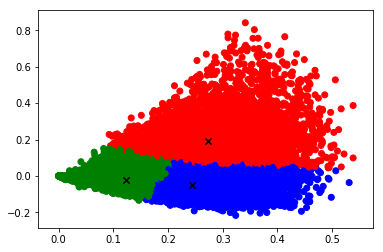

In [48]:
lsa = TruncatedSVD(2)
Z2 = lsa.fit_transform(X)
print(Z2.shape)

kmeans = KMeans(3)
clusters2 = kmeans.fit_predict(Z2)
clusters2

colors = np.array(['r', 'g', 'b'])
plt.scatter(Z2[:,0],Z2[:,1], color = colors[clusters2] )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 40, 'k', 'x')

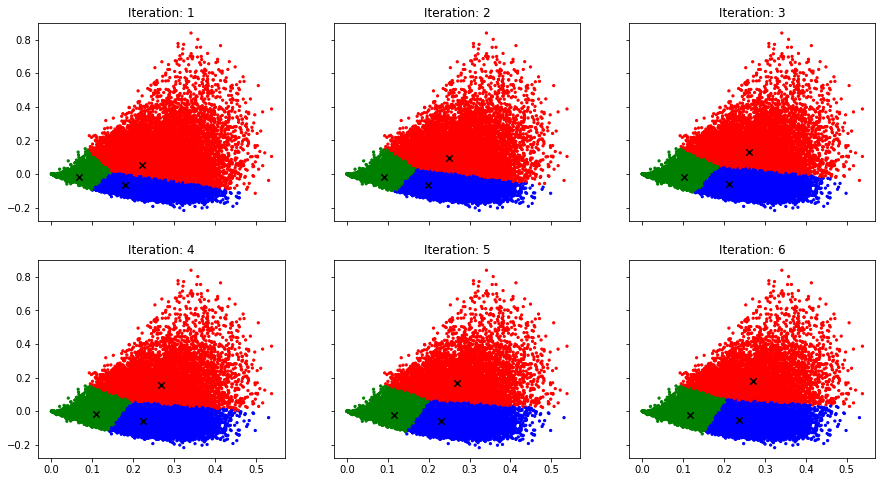

In [47]:
f, axarr = plt.subplots(2, 3,  sharex='col', sharey='row', figsize = (15, 8))

for i in range(2):
    for j in range(3):
        max_iter = i * 3 + j + 1
        kmeans = KMeans(3, init = 'random', max_iter = max_iter, random_state = 100, n_init = 1)
        clusters2 = kmeans.fit_predict(Z2)
        axarr[i, j].scatter(Z2[:, 0], Z2[:, 1], 5, colors[clusters2])
        axarr[i, j].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 40, 'k', 'x')
        axarr[i, j].set_title("Iteration: %d" % max_iter)

### ANALYSIS
#### We can see from the plot, as we could also see from the histogram, that most of the songs have been clustered in one cluster. Red colour represents the second cluster with highest number of songs. Blue represents the 3rd cluster while green represents the 1st clustre with the least number of songs. 
#### We can observe the movement of centroids from one iteration to the other and can see that to start with a very large number of songs are clustered in the red cluster, which eventually decreases and a few of these songs join the green and blue clusters. 